### Treść zadania

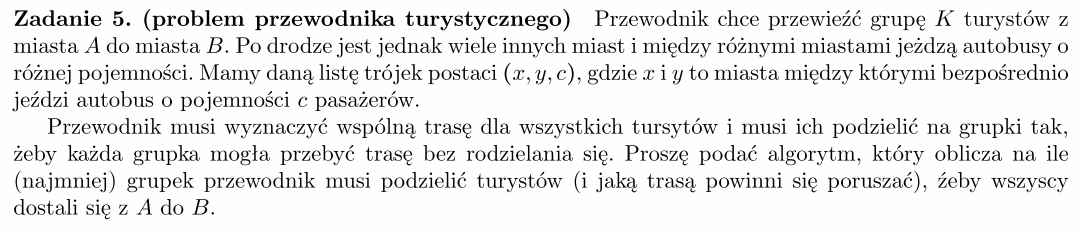

### Omówienie algorytmu

Problem polega na znalezieniu ścieżki o maksymalnym wąskim gardle, czyli takiej ścieżki między parą wierzchołków $ x $ i $ y $, że waga krawędzi o najmniejszej wadze jest największa spośród najmniejszych wag dla wszystkich ścieżek, które łączą $ x $ z $ y $. Warto zauważyć, że trójki, które dostajemy na wejściu, odpowiadają tak naprawdę ważonym krawędziom skierowanym, z których budujemy graf. Do znalezienia ścieżki o najwięszkej przepustowości (zmaksymalizowanym wąskim gardle) wykorzystujemy nieco zmodyfikowany algorytm Dijkstry. Tym razem nie szukamy najkrótszych ścieżek, ale ścieżek o maksymalnej przepustowości. Nie będziemy więc korzystać z kolejki priorytetowej typu minimum, ponieważ chcemy zmaksymalizować przepustowość. Konieczne więc będzie wrzucanie do kolejki typu maksimum odpowiedniego wierzchołka wraz z priorytetem równym przepustowości dotychczasowej najlepszej ścieżki (ścieżki o największej przepustowości), jaka łączy wierzchołek startowy z danym wierzchołkiem. Z kolejki zawsze będziemy ściągać ścieżkę o największym wąskim gardle, a więc taką, dla której istnieje największa szansa na uzyskanie maksymalnego przepływu. Ponieważ w zadaniu jesteśmy zapytani o znalezienie liczby grup turystów, wystarczy podzielić liczbę wszystkich turystów przez przepustowość wyznaczonej ścieżki i wziąć sufit z obliczonej wartości.

### Złożoność

###### Obliczeniowa:
$ O(E \cdot log(V)) $  - jak algorytmu Dijkstry dla reprezentacji listowej grafu
###### Pamięciowa:
$ O(E + V) $  - bo tworzymy graf na podstawie listy krawędzi (połączeń miast)

### Implementacja

In [1]:
import math


class MaxPriorityQueue:
    def __init__(self):
        self._heap = []

    def __len__(self) -> int:
        return len(self._heap)

    def insert(self, priority: int, val: object):
        if not isinstance(priority, int):
            raise TypeError(f"priority must be 'int', not {str(type(priority))[7:-1]}")
        # Add a value as the last node of our Complete Binary Tree
        self._heap.append((priority, val))
        # Fix heap in order to satisfy a max-heap property
        self._heapify_up(len(self) - 1)

    # Removes the first value in a priority queue (of the greatest priority)
    def poll(self) -> (int, object):
        if not self:
            raise IndexError(f'poll from an empty {self.__class__.__name__}')
        # Store a value to be returned
        removed = self._heap[0]
        # Place the last leaf in the root position
        last = self._heap.pop()
        if len(self) > 0:
            self._heap[0] = last
            # Fix a heap in order to satisfy a max-heap property
            self._heapify_down(0, len(self))
        return removed

    def get_first(self) -> (int, object):
        return self._heap[0] if self._heap else None

    @staticmethod
    def _parent_idx(curr_idx):
        return (curr_idx - 1) // 2

    @staticmethod
    def _left_child_idx(curr_idx):
        return curr_idx * 2 + 1

    @staticmethod
    def _right_child_idx(curr_idx):
        return curr_idx * 2 + 2

    def _swap(self, i, j):
        self._heap[i], self._heap[j] = self._heap[j], self._heap[i]

    def _heapify_up(self, curr_idx, end_idx=0):
        while curr_idx > end_idx:
            parent_idx = self._parent_idx(curr_idx)
            if self._heap[curr_idx][0] > self._heap[parent_idx][0]:
                self._swap(curr_idx, parent_idx)
            curr_idx = parent_idx

    def _heapify_down(self, curr_idx, end_idx):
        while True:
            l = self._left_child_idx(curr_idx)
            r = self._right_child_idx(curr_idx)
            largest_idx = curr_idx

            if l < end_idx:
                if self._heap[l][0] > self._heap[curr_idx][0]:
                    largest_idx = l
                if r < end_idx and self._heap[r][0] > self._heap[largest_idx][0]:
                    largest_idx = r

            # Break a loop if the current index is an index of an element
            # with the largest priority value
            if largest_idx == curr_idx:
                break

            self._swap(curr_idx, largest_idx)
            curr_idx = largest_idx
            
            
def max_flow_path(G: 'graph represented by adjacency lists',
                  s: 'start vertex',
                  t: 'target vertex'):
    inf = float('inf')
    if s == t: inf
    n = len(G)
    pq = MaxPriorityQueue()
    flows = [0] * n
    flows[s] = inf

    # Insert all the neighbours of the start vertex to a priority
    # queue with a priority which is a weight of an edge from 's' to 'v'
    for v, flow in G[s]:
        pq.insert(flow, v)

    while pq:
        curr_flow, u = pq.poll()

        # Update the max flow value of the 'u' vertex and its parent
        if curr_flow > flows[u]:
            flows[u] = curr_flow
            # Check if a target was reached
            if u == t: break
            # Add all neighbours of the current 'u' vertex that have no
            # max flow path calculated yet to a priority queue
            for v, flow in G[u]:
                if not flows[v]:
                    # Update a path's flow value if the last edge's weight
                    # is lower than a total flow od a path to 'u' vertex
                    pq.insert(min(curr_flow, flow), v)

    return flows[t]


def directed_weighted_graph_list(E: 'array of edges'):
    # Find a number of vertices
    n = 0
    for e in E:
        n = max(n, e[0], e[1])
    n += 1
    # Create a graph
    G = [[] for _ in range(n)]
    for e in E:
        G[e[0]].append((e[1], e[2]))
    return G


def tourists(C: 'array of cities connections and capacities',
             x: 'start city',
             y: 'end city',
             t: 'number of tourists'):
    G = directed_weighted_graph_list(C)
    flow = max_flow_path(G, x, y)
    return math.ceil(t / flow)

###### Kilka testów

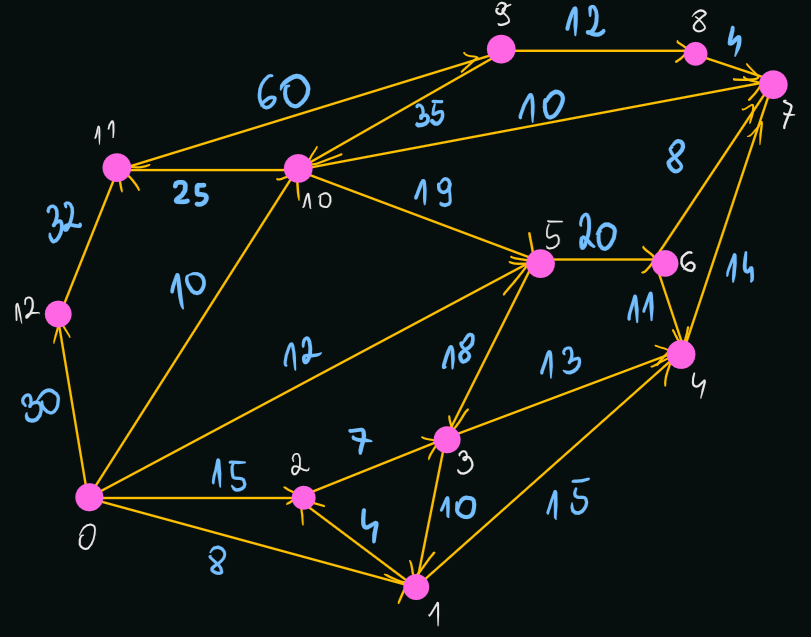

In [2]:
C = [(0, 1, 8), (0, 2, 15), (0, 5, 12), (0, 10, 10), (0, 12, 30), (1, 4, 15), (1, 2, 4), (2, 3, 7), (3, 1, 10), 
     (3, 4, 13), (4, 7, 14), (5, 6, 20), (5, 3, 18), (6, 4, 11), (6, 7, 8), (8, 7, 4), (9, 8, 12), (10, 5, 19),
     (10, 11, 25), (10, 7, 10), (11, 9, 60), (12, 11, 32), (9, 10, 25)]

num_tourists = 100
s = 0
t = 3
print(tourists(C, s, t, num_tourists))

6


In [3]:
num_tourists = 50
s = 0
t = 7
print(tourists(C, s, t, num_tourists))

4


### (Dodatkowo) Odtwarzanie ścieżki o maksymalnej przepustowości

In [4]:
class MaxPriorityQueue:
    def __init__(self):
        self._heap = []

    def __len__(self) -> int:
        return len(self._heap)

    def insert(self, priority: int, val: object):
        if not isinstance(priority, int):
            raise TypeError(f"priority must be 'int', not {str(type(priority))[7:-1]}")
        # Add a value as the last node of our Complete Binary Tree
        self._heap.append((priority, val))
        # Fix heap in order to satisfy a max-heap property
        self._heapify_up(len(self) - 1)

    # Removes the first value in a priority queue (of the greatest priority)
    def poll(self) -> (int, object):
        if not self:
            raise IndexError(f'poll from an empty {self.__class__.__name__}')
        # Store a value to be returned
        removed = self._heap[0]
        # Place the last leaf in the root position
        last = self._heap.pop()
        if len(self) > 0:
            self._heap[0] = last
            # Fix a heap in order to satisfy a max-heap property
            self._heapify_down(0, len(self))
        return removed

    def get_first(self) -> (int, object):
        return self._heap[0] if self._heap else None

    @staticmethod
    def _parent_idx(curr_idx):
        return (curr_idx - 1) // 2

    @staticmethod
    def _left_child_idx(curr_idx):
        return curr_idx * 2 + 1

    @staticmethod
    def _right_child_idx(curr_idx):
        return curr_idx * 2 + 2

    def _swap(self, i, j):
        self._heap[i], self._heap[j] = self._heap[j], self._heap[i]

    def _heapify_up(self, curr_idx, end_idx=0):
        while curr_idx > end_idx:
            parent_idx = self._parent_idx(curr_idx)
            if self._heap[curr_idx][0] > self._heap[parent_idx][0]:
                self._swap(curr_idx, parent_idx)
            curr_idx = parent_idx

    def _heapify_down(self, curr_idx, end_idx):
        while True:
            l = self._left_child_idx(curr_idx)
            r = self._right_child_idx(curr_idx)
            largest_idx = curr_idx

            if l < end_idx:
                if self._heap[l][0] > self._heap[curr_idx][0]:
                    largest_idx = l
                if r < end_idx and self._heap[r][0] > self._heap[largest_idx][0]:
                    largest_idx = r

            # Break a loop if the current index is an index of an element
            # with the largest priority value
            if largest_idx == curr_idx:
                break

            self._swap(curr_idx, largest_idx)
            curr_idx = largest_idx


def reconstruct_path(parents, t):
    path = []

    while t is not None:
        path.append(t)
        t = parents[t]

    n = len(path)
    for i in range(n // 2):
        swap(path, i, n - 1 - i)

    return path


def swap(A, i, j):
    A[i], A[j] = A[j], A[i]


def max_extending_path(G: 'graph represented by adjacency lists',
                       s: 'start vertex',
                       t: 'target vertex') -> ('flow amount', list):
    inf = float('inf')
    if s == t: return (inf, [])
    n = len(G)
    pq = MaxPriorityQueue()
    parents = [None] * n
    flows = [0] * n
    flows[s] = inf

    # Insert all the neighbours of the start vertex to a priority
    # queue with a priority which is a weight of an edge from 's' to 'v'
    for v, flow in G[s]:
        pq.insert(flow, (v, s))

    found = False

    while pq:
        curr_flow, (u, parent) = pq.poll()
        # Update the max flow value of the 'u' vertex and its parent
        if curr_flow > flows[u]:
            flows[u] = curr_flow
            parents[u] = parent

            # Check if a target was reached
            if u == t:
                found = True
                break

            # Add all neighbours of the current 'u' vertex that have no
            # max flow path calculated yet to a priority queue
            for v, flow in G[u]:
                if not flows[v]:
                    # Update a path's flow value if the last edge's weight
                    # is lower than a total flow od a path to 'u' vertex
                    pq.insert(min(curr_flow, flow), (v, u))
    
    # Create a path from the source to the target which was calculated as a path
    # of the largest flow if such a path exists (if 't' is reachable from 's')
    return (flows[t], reconstruct_path(parents, t)) if found else (-1, [])


def directed_weighted_graph_list(E: 'array of edges'):
    # Find a number of vertices
    n = 0
    for e in E:
        n = max(n, e[0], e[1])
    n += 1
    # Create a graph
    G = [[] for _ in range(n)]
    for e in E:
        G[e[0]].append((e[1], e[2]))
    return G


def tourists(C: 'array of cities connections and capacities',
             x: 'start city',
             y: 'end city',
             t: 'number of tourists'):
    G = directed_weighted_graph_list(C)
    flow, path = max_extending_path(G, x, y)
    return math.ceil(t / flow), path

###### Kilka testów

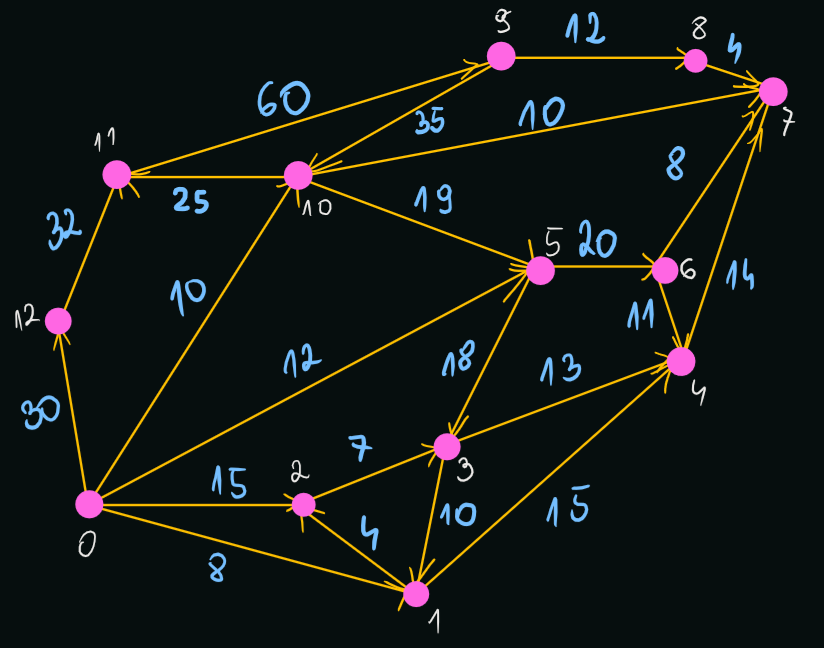

In [5]:
C = [(0, 1, 8), (0, 2, 15), (0, 5, 12), (0, 10, 10), (0, 12, 30), (1, 4, 15), (1, 2, 4), (2, 3, 7), (3, 1, 10), 
     (3, 4, 13), (4, 7, 14), (5, 6, 20), (5, 3, 18), (6, 4, 11), (6, 7, 8), (8, 7, 4), (9, 8, 12), (10, 5, 19),
     (10, 11, 25), (10, 7, 10), (11, 9, 60), (12, 11, 32), (9, 10, 25)]

num_tourists = 100
s = 0
t = 3
print(tourists(C, s, t, num_tourists))

(6, [0, 12, 11, 9, 10, 5, 3])


In [6]:
num_tourists = 50
s = 0
t = 7
print(tourists(C, s, t, num_tourists))

(4, [0, 12, 11, 9, 10, 5, 3, 4, 7])
